---
format:
  html:
    other-links:
      - text: This notebook
        href: L10 Polynomial Interpolation III.ipynb
---

# Polynomial Interpolation III

<div style='background-color: #ffe0b2; padding: 10px; border-left: 5px solid #ff9800;'><strong>Note.</strong>  These notes are mainly a record of what we discussed and are not a substitute for attending the lectures and reading books! If anything is unclear/wrong, let me know and I will update the notes.
 </div> 

In [1]:
include("preamble.jl")

✓ file included! 

using: Plots, LaTeXStrings, Polynomials, PrettyTables 

Functions included: 
    simple_iteration, 
    Newton, 
    orderOfConvergence, 
    ChebyshevNodes 

Use @doc <<function>> for help


## Previously.....

### Lagrange Interpolation Problem:

Suppose that $X = \{ x_0 < \cdots < x_n \}$ is a set of distinct *interpolation nodes*. 

***Aim***: find $p$ such that $p(x_j) = f(x_j)$ for all $j = 0, \dots, n$. 

<div class='alert alert-block alert-info'><b>Theorem (Lagrange Interpolation)</b> 

For $x_0 < \cdots < x_n$ (*nodes*) and a function $f$ defined on $X = \{x_0,\dots,x_n\}$, there exists a unique polynomial *interpolant* $I_Xf$ of degree at most $n$ such that $I_Xf(x_j) = f(x_j)$ for all $j=0,\dots,n$. 

</div> 

In the following, we will write $\mathcal P_n := \{p(x) = \sum_{j=0}^n a_j x^j \colon a_0, \dots,a_n \in \mathbb R\}$ for the set of polynomials of degree at most $n$.

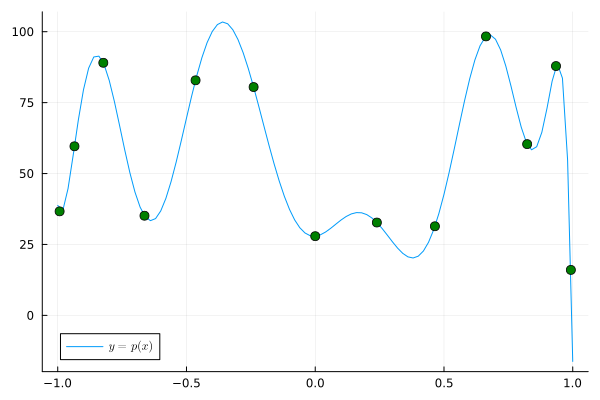

In [2]:
N = 30
X = ChebyshevNodes(12, type=1)
Y = @. X + 100*rand()

p = fit( X, Y )

plot( p, -1, 1, label=L"y = p(x)")
scatter!( X, Y, 
    primary = false, markersize = 5, color="green")

<div class='alert alert-block alert-info'><b>Theorem.</b> 

Suppose $f:[a,b]\to\mathbb R$ is $n+1$ times continuously differentiable and $X = \{x_0 < \dots < x_n\}$. Then, for all $x \in [a,b]$ there exists $\xi_x \in [\min \{x,x_0\} , \max \{x,x_n\}]$ such that 

\begin{align}
    f(x) - I_Xf(x) = \frac{f^{(n+1)}(\xi_x)}{(n+1)!} (x - x_0)(x-x_1) \cdots (x-x_n)
\end{align}

In particular, we have 

\begin{align}
    \left\| f - I_Xf \right\|_{L^\infty([a,b])} \leq \|f^{(n+1)}\|_{L^\infty([a,b])} \frac{\|\ell_X(x)\|_{L^\infty([a,b])}}{(n+1)!}  
\end{align}

where $\ell_X(x) := (x-x_0)(x-x_1)\cdots (x-x_n)$ is the *node polynomial* and $\| f \|_{L^\infty([a,b])} := \max_{x\in[a,b]} |f(x)|$.
</div> 

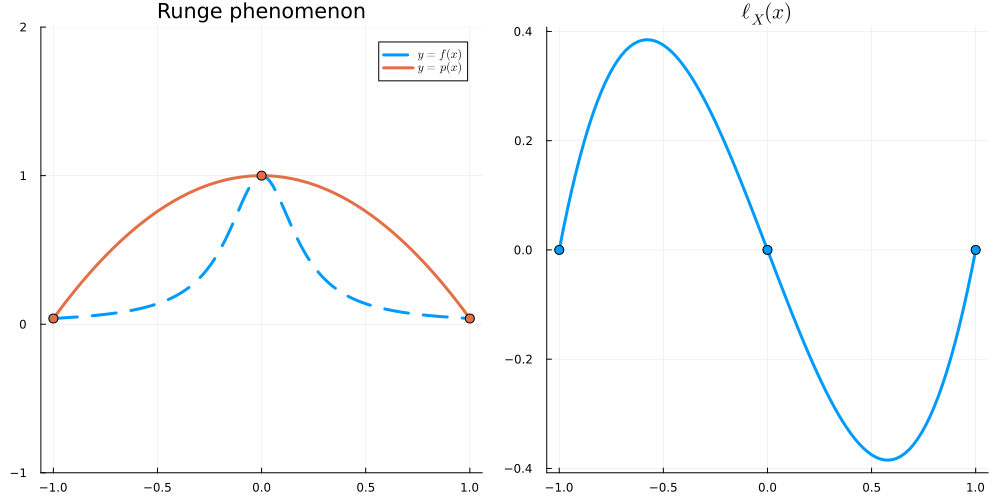


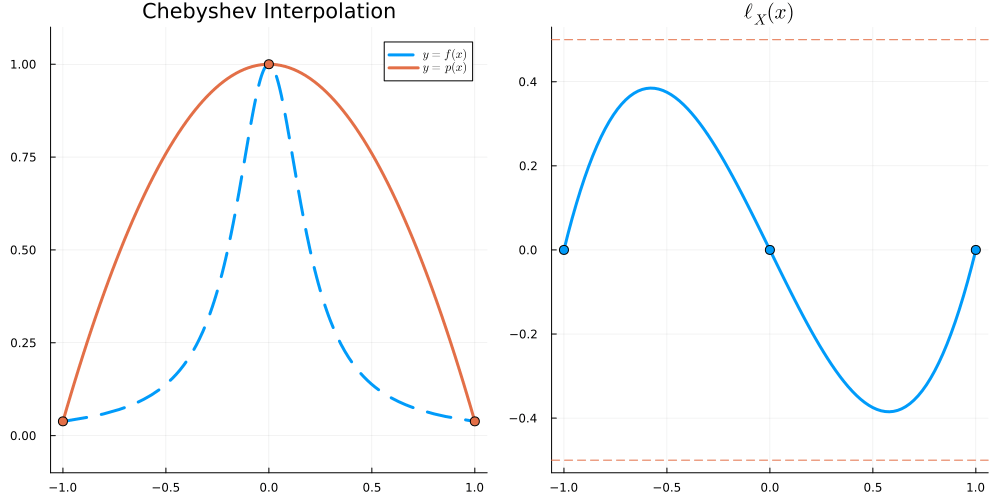



For $x \in [-1,1]$, we have 
\begin{align}
    |\ell_X(x)| &\leq \frac{e}{2\sqrt{n}} \left( \frac2e \right)^n
    &\text{for Equispaced nodes }  X = \Big\{ \frac{2j-n}{n} \Big\}_{j=0}^n \\
    |\ell_X(x)| &\leq 2^{1-n}
    &\text{for Chebyshev nodes } X = \Big\{ \cos \frac{j\pi}{n} \Big\}_{j=0}^n
\end{align}

## How to choose $X$ to minimise $\| \ell_X \|_{L^\infty([-1,1])}$?

In this section, we will write $\| f \|_{L^\infty} := \max_{x \in [-1,1]} |f(x)|$. 

Recall that 

\begin{align}
    \left\| f - I_Xf \right\|_{L^\infty} \leq \frac{\|f^{(n+1)}\|_{L^\infty}}{(n+1)!} \|\ell_X\|_{L^\infty}  
\end{align}

so it is natural to want to minimise 

\begin{align}
    \|\ell_X\|_{L^\infty} = \max_{x \in [-1,1]} |(x-x_0)(x-x_1)\dots(x-x_n)|
\end{align}

over all choices of $X = \{x_0,\dots,x_n\}$. Equivalently, we are minimising $\| p \|_{L^\infty}$ over all *monic* polynomials $p$ of degree $n+1$: that is, over all $p$ such that $p(x) = x^{n+1} + q(x)$ with $q\in \mathcal P_n$. We will show that scaled Chebyshev polynomials (of the first kind) solve this (so-called *Chebyshev*) problem.

### A Very Brief Introduction to Chebyshev Polynomials

For $x \in [-1,1]$ there exists $\theta \in [0,\pi]$ such that $x = \cos\theta$. We can therefore define $T_n$ on $[-1,1]$ by the condition that

\begin{align}
T_n( \cos \theta ) = \cos n\theta.
\end{align}

for $n = 0,1,2,...$.

We define $X_{\mathrm{I}}$ to be the set of $n+1$ zeros of $T_{n+1}$ and $X_{\mathrm{II}}$ to be the set of $n+1$ extreme points of $T_n$.

\begin{align}
    X_{\mathrm I} &= \Big\{ \cos \frac{(2j+1)\pi}{2(n+1)} \Big\}_{j=0}^{n} \nonumber\\
    X_{\mathrm{II}} &= \big\{ \cos\tfrac{j\pi}{n} \big\}_{j=0}^n
\end{align}

$X_{\mathrm{I}}$ and $X_{\mathrm{II}}$ are the *Chebyshev nodes of the first and second kind*, respectively.

Here, we plot the first $5$ Chebyshev polynomials on $[-1,1]$ together with $(x, T_n(x))$ for $x \in X_{\mathrm{II}}$ with $n=5$

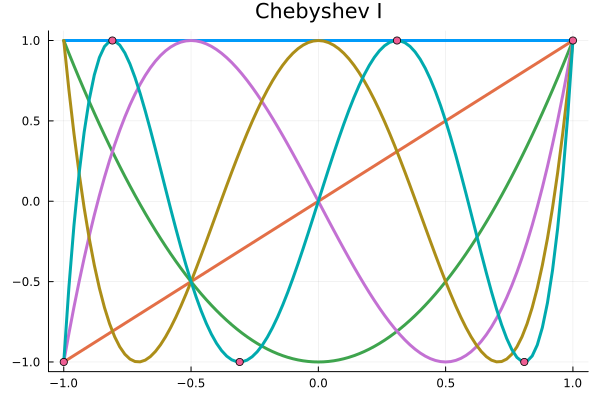

In [3]:
plot(ChebyshevT([1.]), -1, 1, title="Chebyshev I", legend = false, lw = 3)
plot!(ChebyshevT([0, 1]), -1, 1, title="Chebyshev I", legend = false, lw = 3)
plot!(ChebyshevT([0,0,1.]), -1, 1, title="Chebyshev I", legend = false, lw = 3)
plot!(ChebyshevT([0,0,0,1.]), -1, 1, title="Chebyshev I", legend = false, lw = 3)
plot!(ChebyshevT([0,0,0,0,1.]), -1, 1, title="Chebyshev I", legend = false, lw = 3)

p = ChebyshevT([0,0,0,0,0,1.])
plot!(p, -1, 1, title="Chebyshev I", legend = false, lw = 3)

scatter!( @. cos( pi*(0:5)/5 ), @. p( cos( pi* (0:5)/5 ) ) )

We define the *monic* (with leading coefficient equal to $1$) Chebyshev polynomials as $t_0(x) = 1$ and $t_n(x) := 2^{1-n} T_n(x)$ for $n \geq 1$. We are ready for the main result of this section ("Which nodes to choose?"):

<div class='alert alert-block alert-info'><b>Theorem.</b> 

The monic Chebyshev polynomials solve the Chebyshev problem (on $[-1,1]$). That is, 

\begin{align}
    \|t_{n+1} \|_{L^\infty([-1,1])} = \min_{p = x^{n+1} + q : \,\, q \in \mathcal P_n  } \big\| p \big\|_{L^\infty([-1,1])}.
\end{align}

</div> 

We have therefore shown that, choosing $X =X_{\mathrm{I}}=  \{ \text{zeros of }t_{n+1} \}$ minimises the node polynomial in the following sense

\begin{align}
    \min_{ y_0 < \dots < y_n } \| \ell_{Y} \|_{L^\infty([-1,1])} \geq \| \ell_X \|_{L^\infty([-1,1])} = 2^{-n}
\end{align} 

It turns out that $\ell_{X_{\mathrm{II}}}(x) = 2^{-n} \big( T_{n+1}(x) - T_{n-1}(x) \big)$ and so $\|\ell_{X_{\mathrm{II}}}\|_{L^\infty([-1,1])} \leq 2^{1-n}$ (here, we used $|T_{n}|\leq 1$) and so, in practice, one expects the same approximation rates when using $X = X_{\mathrm{II}} = \{\text{extreme points of } T_n \}$.  

## Barycentric formula for Chebyshev

Using the standard Lagrange formulation $p(x) = \sum_{j=0}^n \ell_j(x) f(x_j)$ is slow and unstable! Computing $\ell_j(x)$ for a single $x$ requires $O(n)$ operations and thus evaluating $p(x)$ requires $O(n^2)$. Moreover, due to subtractive cancellation, this method is unstable.

 11.514745 seconds (25.91 M allocations: 15.135 GiB, 19.87% gc time, 4.09% compilation time)


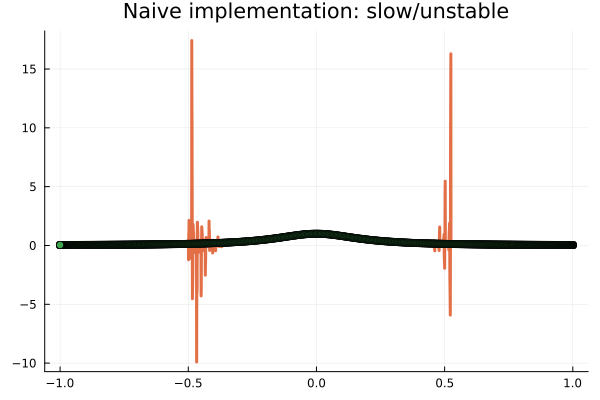

In [4]:
n = 1000

x = @. cos( π*(0:n)/n )
y = @. Runge( x )

function L( j, t ) 
    if j == 0
        return prod( @. t - x[2:end] ) / prod( @. x[1] - x[2:end] )
    elseif j == length(x)-1 
        return prod( @. t - x[1:end-1] ) / prod( @. x[end] - x[1:end-1] )
    else
        return prod( @. t - x[1:j] ) * prod( @. t - x[(j+2):end] ) / ( prod( @. x[j+1] - x[1:j] ) * prod( @. x[j+1] - x[(j+2):end] ) )
    end
end 

function p_naive( t ) 
    r = 0
    for j in 0:(length(x)-1)
        r = r + L(j, t ) * y[j+1] 
    end
    return r
end 

plot(Runge, -1, 1, label=L"y = f(x)", lw = 3, linestyle = :dash, legend=false)
@time plot!( t -> p_naive( t ), -1, 1, title="Naive implementation: slow/unstable", lw = 3 )
scatter!( [x], [Runge.(x)])

Instead, we may use the Barycentric formula: First notice that 

\begin{align}
    \ell_j(x) = \prod_{k \not= j} \frac{x - x_k}{x_j - x_k} = \frac{\ell_X(x)}{x- x_j} \frac{1}{ \prod_{k \not= j} (x_j - x_k) }
\end{align}

Therefore on defining $\lambda_j := \left( \prod_{k \not= j} (x_j - x_k) \right)^{-1}$ and dividing by $\sum_{j=0}^n \ell_j(x) = 1$, we obtain

\begin{align}
    p(x) &= \left. \sum_{j=0}^n \ell_j(x) f(x_j) \middle/ \sum_{j=0}^n \ell_j(x) \right. \nonumber\\
    &= \left. \ell_X(x) \sum_{j=0}^n \frac{\lambda_j f(x_j)}{x - x_j} \middle/ \ell_X(x) \sum_{j=0}^n \frac{\lambda_j}{x - x_j} \right. \nonumber\\
    &= \left. \sum_{j=0}^n \frac{\lambda_j f(x_j)}{x - x_j} \middle/ \sum_{j=0}^n \frac{\lambda_j}{x - x_j} \right.
\end{align}

which is known as the Barycentric Formula. 

For a fixed interpolation set, one may compute $\lambda_j$ once and then evaluating $p(x)$ requires only $O(n)$ computations. 

In fact, for the Chebyshev nodes $X_{\mathrm{II}} = \big\{ \cos \frac{j\pi}{n} \big\}_{j=0}^n$, we have a simple formula for the $\lambda_j$:

\begin{align}
    \lambda_j = \begin{cases}
        \frac{2^{n}}{4n}  & \text{if } j = 0\nonumber\\
        (-1)^j \frac{2^{n}}{2n} & \text{if } j = 1,\dots,n-1 \nonumber\\
        (-1)^n \frac{2^{n}}{4n} & \text{if } j = n
    \end{cases}
\end{align}

Moreover, this formula has been proved to be numerically stable which we demonstrate in the following:

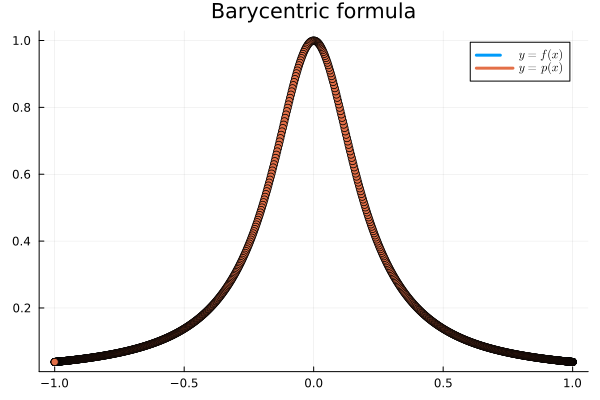

In [5]:
p_bary = ChebyshevInterpolant( Runge, 1000 )

plot(Runge, -1, 1, label=L"y = f(x)", lw = 3, linestyle = :dash, title = "Barycentric formula")
plot!(p_bary, -1, 1, label=L"y = p(x)", lw = 3 )
scatter!( [x], [Runge.(x)], primary = false)

## Newton Form & Divided Differences

FIx $X = \{x_0, x_1, \cdots, x_{n} \}$. Newton polynomials are the node polynomials corresponding to the first nodes in $X$:

\begin{align}
    \pi_0(x) &= 1 \nonumber\\
    \pi_1(x) &= \ell_{\{x_0\}}(x) = (x - x_0) \nonumber\\
    \pi_2(x) &= \ell_{\{ x_0, x_1 \}}(x) = (x - x_0)(x-x_1) \nonumber\\
    \vdots \nonumber\\
    \pi_n(x) &= \ell_{\{ x_0, x_1, \dots, x_{n-1} \}}(x) = (x-x_0)(x-x_1)\cdots (x-x_{n-1})
\end{align}

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Example.</strong> 

We computed the Lagrange interpolation of $f(x) = \sin x$ on $X = \{ 0, \frac\pi2, \pi \}$.

</div> 

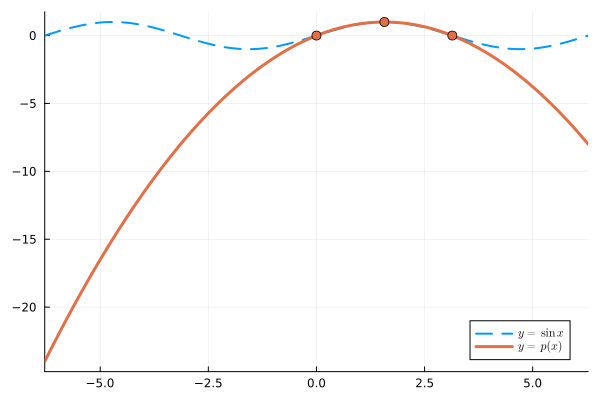

In [6]:
f = x->sin(x)

x = [0, pi/2, pi]
y = f.(x)

p = fit(x,y)
plot(f, -2pi, 2pi,  label=L"y = \sin x", lw=2, linestyle=:dash)
plot!( p, xlims=(-2pi,2pi), label=L"y= p(x)", lw=3)
scatter!( x, y, markersize=5, primary=false)

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'>

Write down the Newton form of this polynomial interpolant.

</div> 

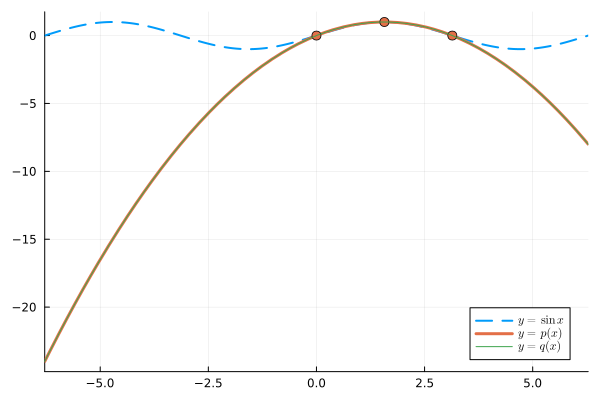

In [7]:
q = (2/π)* Polynomial([0,1,]) - (4/pi^2) * Polynomial( [0, -pi/2, 1] )
plot!(q, xlims=(-2pi,2pi), label=L"y=q(x)")

Notice that if $p$ interpolates $f$ at $X = \{x_0,\dots,x_n\}$ and the $x_j$ are distinct, then

\begin{align}
    p(x) &= a_0 + a_1 (x - x_0) + a_2 (x-x_0)(x-x_1) + \cdots + a_n (x-x_0)(x-x_1) \cdots (x - x_{n-1})\nonumber\\
    %
    &= f(x_0) + \frac{f(x_1) - f(x_0)}{x_1 - x_0} (x-x_0) + a_2 \pi_2(x) + \cdots + a_n \pi_n(x)
\end{align}

<div style='background-color: #ddff99; padding: 10px; border-left: 5px solid #009933;'><strong>Definition.</strong> 

We define the *divided difference* $f[x_{0}, \dots, x_n]$ to be the leading cofficient in the polynomial interpolation $p\in \mathcal P_n$ of $f$ on the set of distinct nodes $X = \{x_0,x_1,\dots, x_n\}$: that is, 

\begin{align}
    p(x) = f[x_0,\dots,x_n] x^n + q(x)
\end{align}

where $q \in \mathcal P_{n-1}$.

</div> 

We have seen that $f[x_0] = f(x_0)$ and $f[x_0,x_1] = \frac{f(x_1) - f(x_0)}{x_1 - x_0}$. (Here, we just solved $p(x_0) = f(x_0)$ and $p(x_1) = f(x_1)$). 


<div class='alert alert-block alert-info'><b>Lemma.</b> 

The divided difference $f[x_{0}, \dots, x_n]$ doesn't depend on the ordering of the interpolation nodes. Moreover, we have *linearity*: $(f + c g)[x_0,...,x_n] = f[x_0,...,x_n] + c g[x_0,...,x_n]$.


</div> 

<div class='alert alert-block alert-success'><b>Proof.</b> 

The polynomial interpolant $p\in \mathcal P_n$ of $f$ on $X$ is independent of the ordering of the nodes. 

Moreover, if $p$ and $q$ are the polynomial interpolants of $f$ and $g$, respectively, then $p + c q$ is a polynomial interpolant of $f+ c g$.

</div> 

<div class='alert alert-block alert-info'><b>Theorem.</b> 

Suppose $X = \{x_0,\cdots,x_n\}$ is a set of $n+1$ distinct interpolation nodes. Then, we have the recursion

\begin{align}
    f[x_0, \dots, x_n] &= \frac
        {f[x_1, \dots, x_n] - f[x_0, \dots, x_{n-1}]}
        {x_n - x_1}
\end{align}

</div> 

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'>

Let's go back to interpolating $f(x) =\sin x$ on $\{0, \frac\pi2, \pi\}$. Now add $-2\pi$ as an interpolation node and compute the new polynomial interpolant. 

We compute the *divided difference table*:

\begin{align}
    &x_0 = 0,               \quad  &f[x_0] = 0,    \qquad &f[x_0,x_1] = \frac{f[x_1] - f[x_0]}{x_1 - x_0} = \frac{2}\pi, 
    \quad &f[x_0,x_1,x_2] = \frac{f[x_1,x_2] - f[x_0,x_1]}{x_2 - x_0} = -\frac{4}{\pi^2} \nonumber\\ 
    %
    &x_1 = \tfrac\pi2,      \quad  &f[x_1] = 1,     \qquad &f[x_1,x_2] = \frac{f[x_2] - f[x_1]}{x_2 - x_1} = -\frac{2}\pi, 
    \quad &f[x_1,x_2,x_3] = \frac{f[x_2,x_3] - f[x_1,x_2]}{x_3 - x_1} = -\tfrac{4}{5\pi^2} \nonumber\\
    %
    &x_2 = \pi,             \quad &f[x_2] = 0,     \qquad &f[x_2,x_3] =  \frac{f[x_3] - f[x_2]}{x_3 - x_2} = 0 \quad & \nonumber\\
    &x_3 = -2\pi,            \quad &f[x_3] = 0,      \qquad &                                                   \quad & \quad &\nonumber
\end{align}

The final entry on the top row is 

\begin{align}
    f[x_0,x_1,x_2,x_3] &= \frac{f[x_1,x_2,x_3] - f[x_0,x_1,x_2]}{x_3 - x_0}
    =  - \frac{ 8 }{ 5 \pi^3 } \nonumber
\end{align}

and so 

\begin{align}
    p(x) = 0 + \frac{2}\pi x - \frac{4}{\pi^2} x \big(x - \tfrac\pi2\big)  - \frac{ 8 }{ 5 \pi^3 } x\big(x - \tfrac\pi2)\big(x - \pi\big) \nonumber
\end{align}

We plot this below:

 </div> 

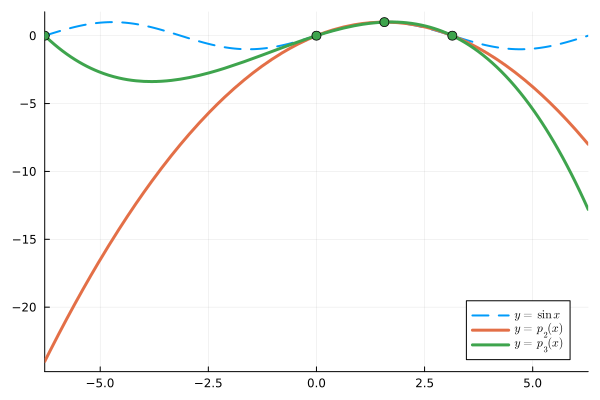

In [8]:
r = x-> - 4*x*(x-pi)/pi^2 - 8*x*(x-pi/2)*(x-pi)/(5*pi^3)

x = [0, pi/2, pi, -2pi]
y = f.(x)

plot(f, -2pi, 2pi,  label=L"y = \sin x", lw=2, linestyle=:dash)
plot!( p, xlims=(-2pi,2pi), label=L"y= p_2(x)", lw=3)
plot!( r, xlims=(-2pi,2pi), label=L"y= p_3(x)", lw=3)
scatter!( x, y, markersize=5, primary=false)

<div class='alert alert-block alert-success'><b>Proof.</b> 

We will now prove the recursive formula. Let $p \in \mathcal P_{n-1}$ be the polynomial interpolation of $f$ on $X = \{x_0,\dots, x_{n-1}\}$ and define $g(x) = (x-x_{n})f(x)$ for some fixed $x_{n} \not\in X$. Then, $g(x)$ and $q(x) := (x - x_{n}) p(x)$ agree on $x_0,...,x_{n-1}, x_{n}$ and so $q$ is the polynomial of least degree interpolating $g$ on $X \cup \{x_{n}\}$. Therefore, the leading coefficient of $q(x) = (x - x_{n}) p(x)$ is both $g[x_0,\dots,x_{n}]$ (because $q$ interpolates $g$ on $X \cup \{x_{n}\}$) and $f[x_0,\cdots,x_{n-1}]$ (because $q$ is $(x-x_{n})$ times $p$). That is, $g[x_0,...,x_{n}] = f[x_0,...,x_{n-1}]$.

That is, we have $\big( (x - x_n) f \big) [x_0,\dots,x_n] = f[x_0,\dots,x_{n-1}]$. By relabeling the indices (which is allowed because $f[x_0,\dots,x_n]$ does not depend on the ordering of the interpolation nodes), we also have $\big( (x - x_0) f \big) [x_0,\dots,x_n] = f[x_1,\dots,x_{n}]$. Therefore, by linearity we have

\begin{align}
    (x_n - x_0) f[x_0,\dots,x_n] &= \big( (x - x_0) f - (x-x_n) f \big) [x_0,\dots,x_n] \nonumber\\
    %
    &= \big( (x - x_0) f \big) [x_0,\dots,x_n] - \big( (x-x_n) f \big) [x_0,\dots,x_n] \nonumber\\
    %
    &= f [x_1,\dots,x_n] - f [x_0,\dots,x_{n-1}] \nonumber
\end{align}
</div> 

## Hermite Interpolation

Now consider the *multiset* $X = \{\{ x_0, x_1, \dots, x_{n} \}\}$ where $x_j$ appears $m_j \geq 1$ times in $X$.

Hermite: find $p$ such that 

\begin{align}
    p(x_j) = f(x_j),  &\quad p'(x_j) = f'(x_j),  &\quad ... &\quad p^{(m_j-1)}(x_j) = f^{(m_j-1)}(x_j).
\end{align}

<div class='alert alert-block alert-warning'><b>Exercise.</b> 

What is the least degree polynomial interpolant on $X = \{x_0, x_0, x_0, \cdots, x_0\}$?
</div> 

<div class='alert alert-block alert-info'><b>Theorem.</b> 

There exists a unique polynomial of degree at most $n$ solving the Hermite interpolation problem.

</div> 

Again, we define the divided differences (but now for the more general case where we may have repeated interpolation nodes):

<div style='background-color: #ddff99; padding: 10px; border-left: 5px solid #009933;'><strong>Definition.</strong> 

We define the divided difference $f[x_{0}, \dots, x_n]$ to be the leading cofficient in the polynomial interpolation $p\in \mathcal P_n$ solving the Hermite interpolation problem for $f$ on $X$:

\begin{align}
    p(x) = f[x_0,\dots,x_n] x^n + q(x)
\end{align}

where $q \in \mathcal P_{n-1}$ and $p^{(l)}(x_j) = f^{(l)}(x_j)$ for $l = 0,\dots,m_j-1$.

</div> 

<div class='alert alert-block alert-info'><b>Theorem.</b> 

We have 

\begin{align}
    f[x_0, \dots, x_n] &= \begin{cases}
    \frac{f^{(n)}(x_0)}{n!} & \text{if } x_0 = x_1 = \dots = x_n \\
    \frac
        {f[x_1, \dots, x_n] - f[x_0, \dots, x_{n-1}]}
        {x_n - x_1} &\text{otherwise}
    \end{cases}
\end{align}
</div> 


<div class='alert alert-block alert-success'><b>Proof.</b> 

You have seen above that the Taylor polynomial 

\begin{align}
    T_f(x) =\sum_{j=0}^n \frac{f^{(j)}(x_0)}{j!}(x - x_0)^j 
\end{align}

solves the Hermite interpolation problem on $X = \{\{x_0,\dots,x_n\}\}$ in the case where $x_0 = \dots = x_n$. For such $X$, the leading coefficient in this expression is $f[x_{0}, \dots, x_n] = \frac{f^{(n)}(x_0)}{n!}$. 

One can adapt the proof of the recursive formula that we had for distinct interpolation nodes to this case [exercise].

</div> 

<div class='alert alert-block alert-warning'><b>Exercise.</b> 

What is the Hermite interpolant of $f(x) = \sin x$ on $\{\{ 0,0,\pi, \pi\}\}$? Hint: you can compute the divided difference tables in the same way as before.

</div>